In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## EXPLORATORY DATA ANALYSIS

In [31]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [32]:
df.drop_duplicates(inplace = True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [33]:
df.shape

(96146, 9)

In [34]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [35]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [36]:
df['gender'].value_counts()

gender
0    56161
1    39967
2       18
Name: count, dtype: int64

In [37]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [38]:
smoking = {'never': 0, 'No Info': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever': 5}
df['smoking_history'] = df['smoking_history'].map(smoking)

In [39]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,1.295259,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.418195,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


## CORRELATION HEATMAP

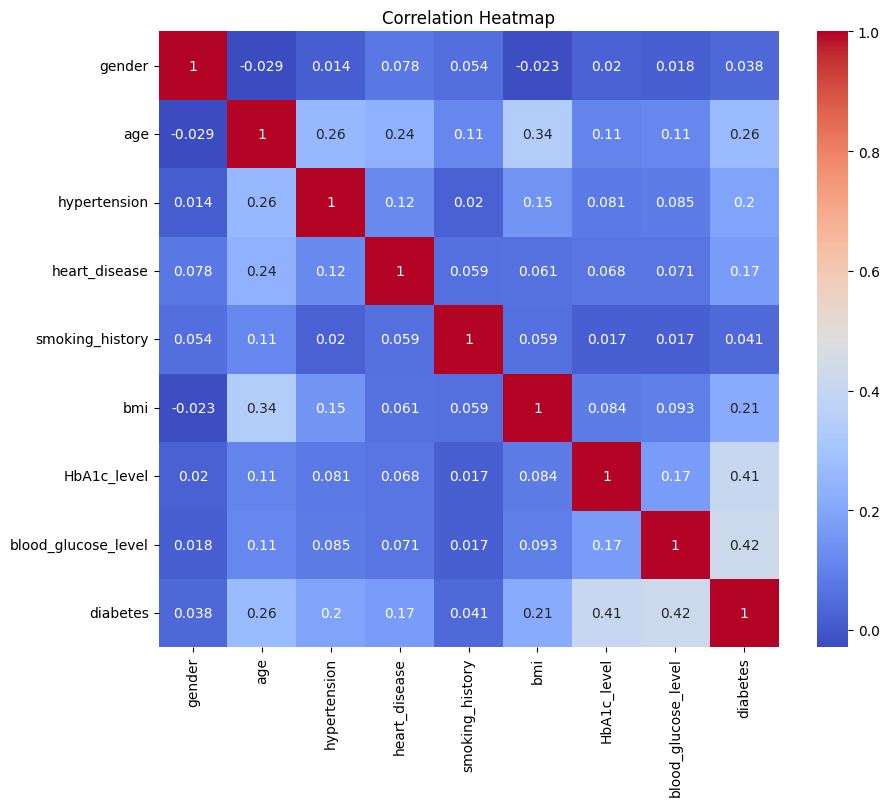

In [41]:
cols = df.select_dtypes(include = ['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: >

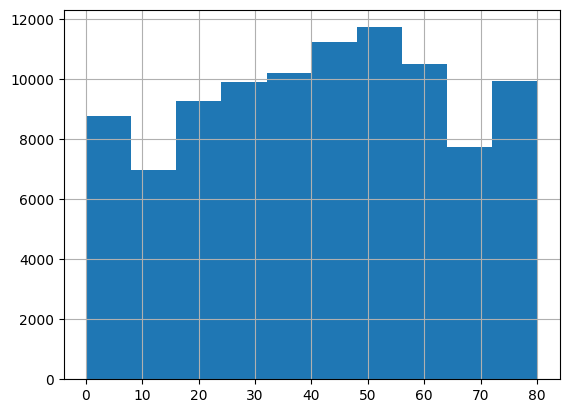

In [42]:
df['age'].hist()

In [43]:
df = df[df['age'].mod(1) == 0]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,1,24.60,4.8,145,0
99996,0,2.0,0,0,1,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [44]:
df['age'] = df['age'].astype(int)
df.head(10)

/tmp/ipykernel_33/3202072260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,3,23.45,5.0,155,0
4,1,76,1,1,3,20.14,4.8,155,0
5,0,20,0,0,0,27.32,6.6,85,0
6,0,44,0,0,0,19.31,6.5,200,1
7,0,79,0,0,1,23.86,5.7,85,0
8,1,42,0,0,0,33.64,4.8,145,0
9,0,32,0,0,0,27.32,5.0,100,0


In [45]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,94133.000000,94133.000000,94133.000000,94133.000000,94133.000000,94133.000000,94133.000000,94133.000000,94133.000000
mean,0.414042,42.665569,0.079260,0.041675,1.302349,27.522871,5.535810,138.325571,0.090107
std,0.492946,21.888652,0.270146,0.199847,1.431312,6.671336,1.075038,41.040439,0.286336
min,0.000000,1.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,23.710000,4.800000,100.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,2.000000,29.990000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


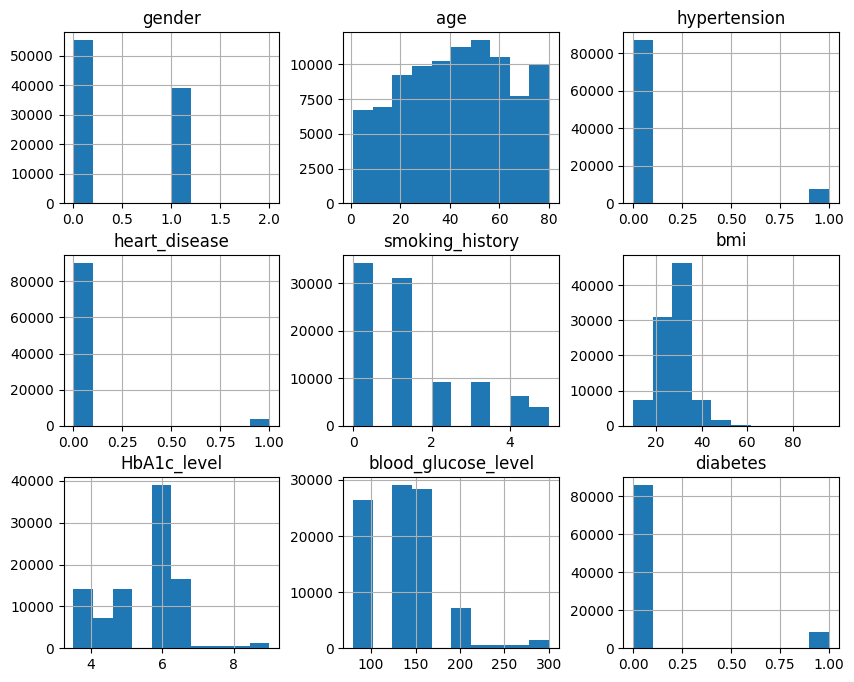

In [46]:
df.hist(bins = 10, figsize = (10, 8))
plt.show()

In [47]:
df['diabetes'].value_counts()

diabetes
0    85651
1     8482
Name: count, dtype: int64

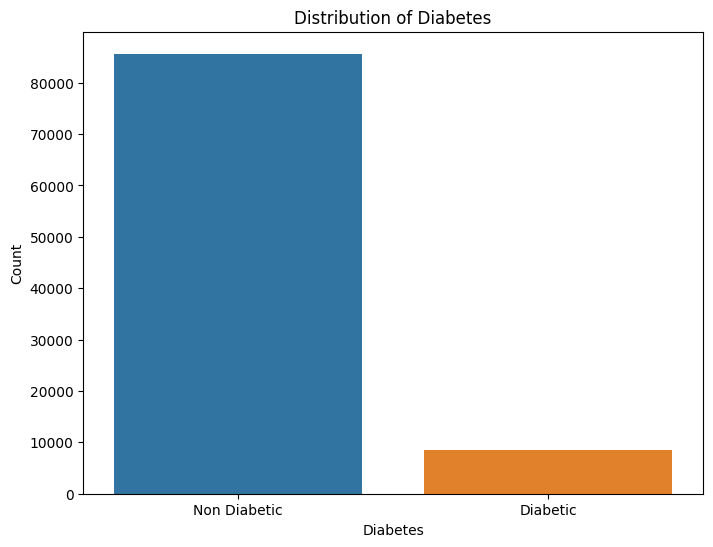

In [48]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'diabetes')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non Diabetic', 'Diabetic'])
plt.show()

we can observe that the dataset is highly imbalanced.

## DATA VISUALIZATION

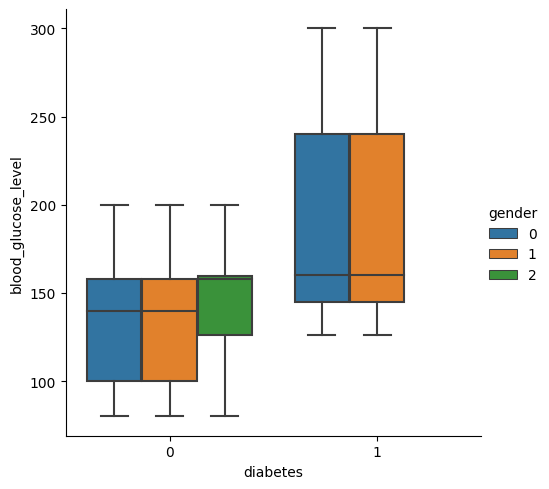

In [51]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

The Box Plot for diabetes VS blood_glucose level appears to be similar for all genders except for the 'other' gender category.

This might be due to the small sample size of the 'other' gender category having only 18 samples amoung the total 96146 samples.

Thus this could give us a potential bias when model training and prediction.

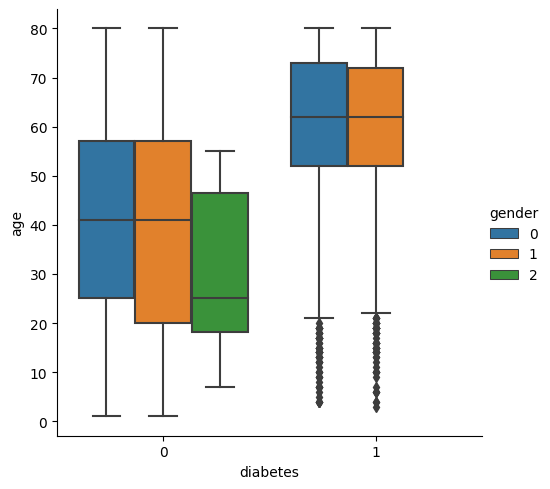

In [53]:
sns.catplot(data = df, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

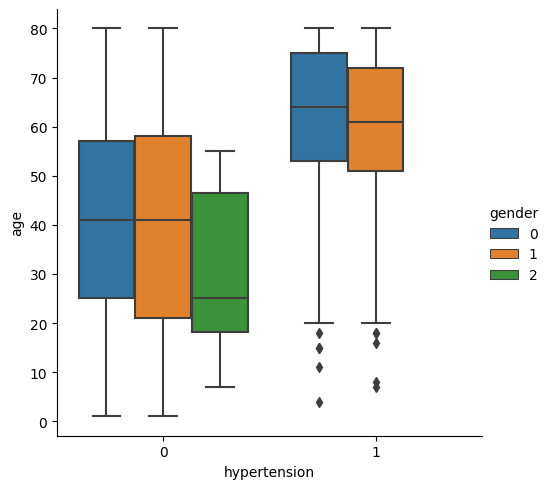

In [54]:
sns.catplot(data = df, x = 'hypertension', y = 'age', kind = 'box', hue = 'gender')
plt.show()

The box plot for 
1. Diabetes VS age 
2. Hypertension VS age 

both looks mostly similar. 
The plots indicates that there is a higher chance of suffering from Diabetes and hypertension with increasing age. 
Females (0) have a little higher probability of gettind diabetes and hypertension with age than Males (1)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gro

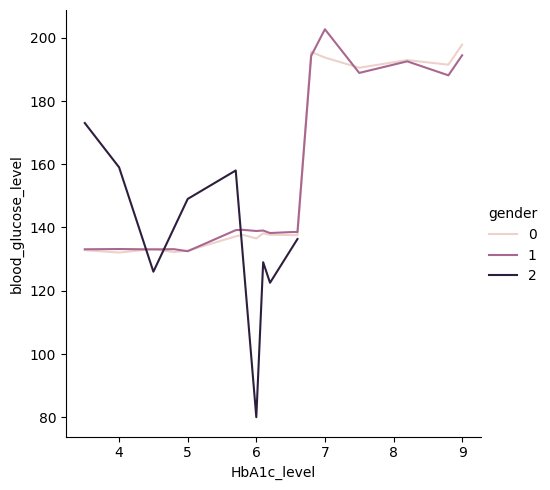

In [57]:
sns.relplot(data = df, x = 'HbA1c_level', y = 'blood_glucose_level', kind = 'line', hue = 'gender', ci = None, markers = True)
plt.show()

The HbA1c level and blood glucose level between males and females have a similar pattern, but it is very different for the 'other' gender category. 

This might be due to the small sample size of the 'other' gender category having only 18 samples amoung the total 96146 samples.

Thus this could give us a potential bias when model training and prediction.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gro

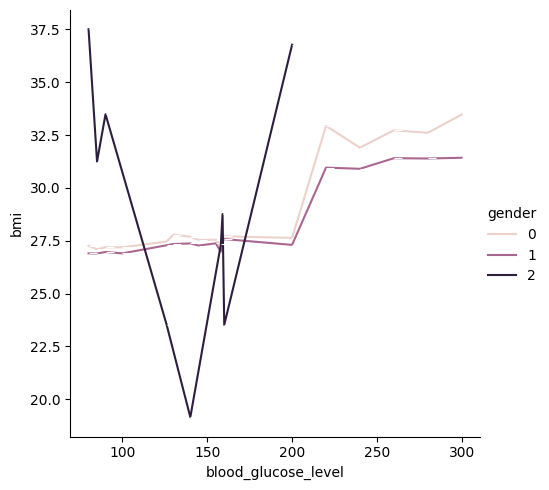

In [58]:
sns.relplot(data = df, x = 'blood_glucose_level', y = 'bmi', kind = 'line', hue = 'gender', ci = None, marker = True)
plt.show()

The Line plot for blood_glucose_level VS BMI shows similar pattern for both males and females, but the pattern is highly different fot the 'other' gender category.

This might be due to the small sample size of the 'other' gender category having only 18 samples amoung the total 96146 samples.

Thus this could give us a potential bias when model training and prediction.

### Since the data is highly imbalanced, we'll apply the SMOTE technique to balance the dependant variables

## Before Applying SMOTE

In [59]:
# spliting the dataset to training and testing

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

feature scaling

In [63]:
from sklearn import preprocessing
standard = preprocessing.StandardScaler()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)

# TRAINING WITHOUT SMOTE

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [65]:
y_pred_lr = lr.predict(x_test)

## Linear SVM

In [66]:
from sklearn.svm import SVC
linear_svc = SVC(kernel = 'linear')
linear_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [68]:
y_pred_svc = linear_svc.predict(x_test)

## Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [72]:
y_pred_gnb = gnb.predict(x_test)

## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred_dtc = dtc.predict(x_test)

## Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [75]:
y_pred_rfc = rfc.predict(x_test)

## KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

# APLYING SMOTE to balance

In [76]:
x_sample, y_sample = train_test_split(df, train_size = 0.8, stratify = y)

In [77]:
x_train = x_sample.iloc[:, :-1].values
y_train = x_sample.iloc[:, -1].values
x_test_s = y_sample.iloc[:, :-1].values
y_test_s = y_sample.iloc[:, -1].values

In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_s, y_train_s = smote.fit_resample(x_train, y_train)

# Training with SMOTE

## Logistic Regression

In [79]:
lr_smote = LogisticRegression()
lr_smote.fit(x_train_s, y_train_s)
y_pred_lr_smote = lr_smote.predict(x_test_s)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Linear SVM

In [80]:
svm_smote = SVC()
svm_smote.fit(x_train_s, y_train_s)
y_pred_svm_smote = svm_smote.predict(x_test_s)

## Naive Bayes

In [86]:
gnb_smote = GaussianNB()
gnb_smote.fit(x_train_s, y_train_s)
y_pred_gnb_smote = gnb_smote.predict(x_test_s)

## Decision Tree

In [87]:
dtc_smote = DecisionTreeClassifier()
dtc_smote.fit(x_train_s, y_train_s)
y_pred_dtc_smote = dtc_smote.predict(x_test_s)

## Random Forest Classifier

In [88]:
rfc_smote = RandomForestClassifier()
rfc_smote.fit(x_train_s, y_train_s)
y_pred_rfc_smote = rfc_smote.predict(x_test_s)

## KNN

In [91]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(x_train_s, y_train_s)
y_pred_knn_smote = knn_smote.predict(x_test_s)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

df = pd.DataFrame({
    'Before/After SMOTE' : ['Before','Before','Before','Before', 'Before','Before','After','After','After','After','After','After'],
    'Model Name': ['LR', 'KNN', 'SVM', 'Naive Bayes', 'DecisionTree', 'RandomForest', 'LR', 'KNN', 'SVM', 'Naive Bayes', 'DecisionTree', 'RandomForest'],
    'True Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[0], confusion_matrix(y_test, y_pred_knn).ravel()[0], confusion_matrix(y_test, y_pred_svc).ravel()[0], confusion_matrix(y_test, y_pred_gnb).ravel()[0], confusion_matrix(y_test, y_pred_dtc).ravel()[0], confusion_matrix(y_test, y_pred_rfc).ravel()[0], confusion_matrix(y_test_s, y_pred_lr_smote).ravel()[0], confusion_matrix(y_test_s, y_pred_knn_smote).ravel()[0], confusion_matrix(y_test_s, y_pred_svm_smote).ravel()[0], confusion_matrix(y_test_s, y_pred_gnb_smote).ravel()[0], confusion_matrix(y_test_s, y_pred_dtc_smote).ravel()[0], confusion_matrix(y_test_s, y_pred_rfc_smote).ravel()[0]],
    'False Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[1], confusion_matrix(y_test, y_pred_knn).ravel()[1], confusion_matrix(y_test, y_pred_svc).ravel()[1], confusion_matrix(y_test, y_pred_gnb).ravel()[1], confusion_matrix(y_test, y_pred_dtc).ravel()[1], confusion_matrix(y_test, y_pred_rfc).ravel()[1], confusion_matrix(y_test_s, y_pred_lr_smote).ravel()[1], confusion_matrix(y_test_s, y_pred_knn_smote).ravel()[1], confusion_matrix(y_test_s, y_pred_svm_smote).ravel()[1], confusion_matrix(y_test_s, y_pred_gnb_smote).ravel()[1], confusion_matrix(y_test_s, y_pred_dtc_smote).ravel()[1], confusion_matrix(y_test_s, y_pred_rfc_smote).ravel()[1]],
    'False Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[2], confusion_matrix(y_test, y_pred_knn).ravel()[2], confusion_matrix(y_test, y_pred_svc).ravel()[2], confusion_matrix(y_test, y_pred_gnb).ravel()[2], confusion_matrix(y_test, y_pred_dtc).ravel()[2], confusion_matrix(y_test, y_pred_rfc).ravel()[2], confusion_matrix(y_test_s, y_pred_lr_smote).ravel()[2], confusion_matrix(y_test_s, y_pred_knn_smote).ravel()[2], confusion_matrix(y_test_s, y_pred_svm_smote).ravel()[2], confusion_matrix(y_test_s, y_pred_gnb_smote).ravel()[2], confusion_matrix(y_test_s, y_pred_dtc_smote).ravel()[2], confusion_matrix(y_test_s, y_pred_rfc_smote).ravel()[2]],
    'True Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[3], confusion_matrix(y_test, y_pred_knn).ravel()[3], confusion_matrix(y_test, y_pred_svc).ravel()[3], confusion_matrix(y_test, y_pred_gnb).ravel()[3], confusion_matrix(y_test, y_pred_dtc).ravel()[3], confusion_matrix(y_test, y_pred_rfc).ravel()[3], confusion_matrix(y_test_s, y_pred_lr_smote).ravel()[3], confusion_matrix(y_test_s, y_pred_knn_smote).ravel()[3], confusion_matrix(y_test_s, y_pred_svm_smote).ravel()[3], confusion_matrix(y_test_s, y_pred_gnb_smote).ravel()[3], confusion_matrix(y_test_s, y_pred_dtc_smote).ravel()[3], confusion_matrix(y_test_s, y_pred_rfc_smote).ravel()[3]], 
    'Accuracy Score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test_s, y_pred_lr_smote), accuracy_score(y_test_s, y_pred_knn_smote), accuracy_score(y_test_s, y_pred_svm_smote), accuracy_score(y_test_s, y_pred_gnb_smote), accuracy_score(y_test_s, y_pred_dtc_smote), accuracy_score(y_test_s, y_pred_rfc_smote)], 
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svc), f1_score(y_test, y_pred_gnb), f1_score(y_test, y_pred_dtc), f1_score(y_test, y_pred_rfc), f1_score(y_test_s, y_pred_lr_smote), f1_score(y_test_s, y_pred_knn_smote), f1_score(y_test_s, y_pred_svm_smote), f1_score(y_test_s, y_pred_gnb_smote), f1_score(y_test_s, y_pred_dtc_smote), f1_score(y_test_s, y_pred_rfc_smote)],
})
df

,Before/After SMOTE,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
0,Before,LR,16936,141,639,1111,0.958570,0.740173
1,Before,KNN,17077,0,1750,0,0.907048,0.000000
2,Before,SVM,17008,69,729,1021,0.957614,0.719014
3,Before,Naive Bayes,15865,1212,601,1149,0.903702,0.558988
4,Before,DecisionTree,17077,0,1750,0,0.907048,0.000000
5,Before,RandomForest,17013,64,543,1207,0.967759,0.799073
6,After,LR,15108,2023,258,1438,0.878844,0.557689
7,After,KNN,15298,1833,347,1349,0.884209,0.553096
8,After,SVM,14909,2222,125,1571,0.875339,0.572418
9,After,Naive Bayes,15223,1908,327,1369,0.881288,0.550573


1. Before Applying SMOTE

a. RandomForest have highest accuracy 96.77%
b. Second highest accuracy if for Logistic Regression with 98.85%
c. KNN F1_Score is 0
d. Decision Tree F1_score is 0

2. After Applying SMOTE

a. RandomForest again has the highest accuracy 96.67%
b. Second highest accuracy is for DecisionTree with 94.49%


# Random Forest Model Exploration

In [99]:
df_rfc = df[df['Model Name'] == 'RandomForest']
df_rfc

,Before/After SMOTE,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
5,Before,RandomForest,17013,64,543,1207,0.967759,0.799073
11,After,RandomForest,16999,132,488,1208,0.967069,0.795784


False Negative reduced from 543 to 488 (approx 9.80% decrease)

### Predict for a person

gender: male age: 23.0 hypertension:0 heart_disease:0, smoking_history:0, bmi:22.9, HbA1c_level:5.4 blood_glucose_level:108

In [100]:
person_X = standard.transform([[1, 23.0, 0, 0, 0, 22.9, 5.4, 108]])
person_X

array([[ 1.18109649, -0.89820401, -0.28724415, -0.20552058, -0.91266705,
        -0.70282555, -0.12878758, -0.73470235]])

In [102]:
person_predict = rfc_smote.predict(person_X)
person_predict = (person_predict > 0.5)
person_predict

array([False])

That means No Diabetes

In [103]:
import pickle

In [105]:
with open('classifier.pkl', 'wb') as file:
    pickle.dump(rfc_smote, file)
